# **Prediksi Biaya Pengobatan Pasien Berdasarkan Dataset Biaya Medis Individu**

# **Melakukan Import Package**
1. pandas merupakan library untuk pemrosesan data analisis
2. numpy merupakan library untuk pemrosesan numerical computing
3. scikit-learn / sklearn merupakan library untuk pemrosesan machine learning
5. matplotlib.pyplot merupakan library untuk pemrosesan plotting 
6. seaborn merupakan library untuk pemrosesan visualisasi data statistik

In [1]:
import numpy as np 
import pandas as pd 

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
%matplotlib inline

# **Membaca File 'insurance.csv' dengan Pandas Dataframe**
* File yang dibaca, akan diubah menjadi dataframe oleh pandas
* Dataframe merupakan struktur data 2 dimensi yang terdiri dari row dan column yang dapat dimodifikasi
* Inisialisasi nama adalah "df"



In [3]:
df = pd.read_csv('insurance.csv')

# **Menampilkan Data**

In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Data yang ditampilkan merupakan 10 data pertama dari file 'insurance.csv' 

# **Menampilkan Deskripsi**

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Data yang ditampilkan:
> 1. Count menentukan jumlah keseluruhan data 
> 2. Mean menentukan rata-rata data
> 3. Standard Deviasi menentukan nilai standar deviasi
> 4. Min menentukan nilai terendah dari data
> 5. 25% menentukan Q1
> 6. 50% menentukan Q2
> 7. 75% menentukan Q3
> 8. Max menentukan nilai tertinggi dari data

# **Menampilkan Informasi**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Informasi yang ditampilkan:
> 1. Fitur  pada dataset
> 2. Jumlah data yang tidak NULL
> 3. Tipe data pada fitur

# **Menampilkan Jumlah Data Pada Dataset**

In [7]:
print('Jumlah baris dan kolom dalam data set:',df.shape)

Jumlah baris dan kolom dalam data set: (1338, 7)


* Jumlah data = 1338 data
* Jumlah fitur = 7

# **Pengecekan Data kosong**

In [8]:
# Check for null count column wise
df.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Melakukan pengecekan nilai pada data. 
Jika terdapat data bernilai NULL, maka nilai akan diubah menjadi 0

# **Visualisasi Data**

* Variabel yang digunakan berasal dari fitur 'Charges'
* Ukuran gambar = 12 x 4

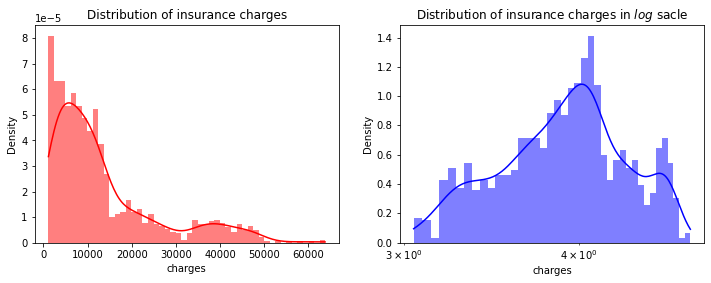

In [9]:
f   = plt.figure(figsize=(12,4))
ax  = f.add_subplot(121)
sns.histplot(df['charges'],bins=50,color='r',ax=ax,kde=True, stat="density", linewidth=0)
ax.set_title('Distribution of insurance charges')

ax  = f.add_subplot(122)
sns.histplot(np.log10(df['charges']),bins=40,color='b',ax=ax, kde=True, stat="density", linewidth=0)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')
plt.show()

# **Visualisasi Variabel Menggunakan 'barplot'**

* Variabel yang digunakan merupakan fitur 'sex', 'smoker', dan 'region' berdasarkan fitur 'Charges'
- Ukuran gambar = 18 x 4

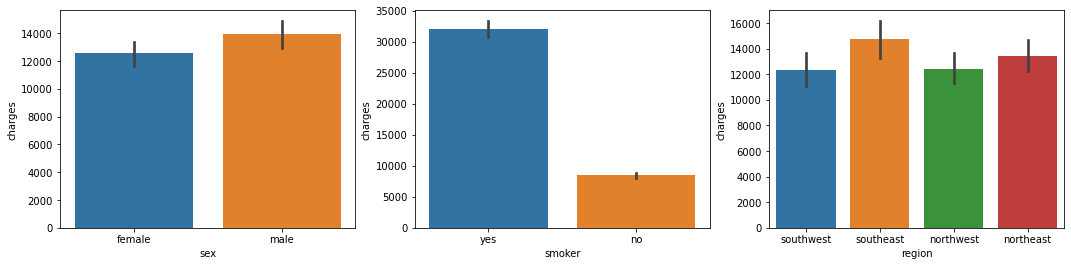

In [10]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.barplot(x='sex', y='charges', data=df)
plt.subplot(132)
sns.barplot(x='smoker', y='charges', data=df)
plt.subplot(133)
sns.barplot(x='region', y='charges', data=df)
plt.show()

# **Visualisasi Data Numeric Menggunakan 'pairplot'**

- variabel yang digunakan berasal dari fitur 'age', 'bmi', 'children', dan 'charges'
- 'seaborn.pairplot' merupakan plot yang digunakan untuk mencari korelasi antar dimensi dalam kumpulan data, dalam plot di bawah ini, korelasi yang dicari adalah di antara 'child' dan 'charges'

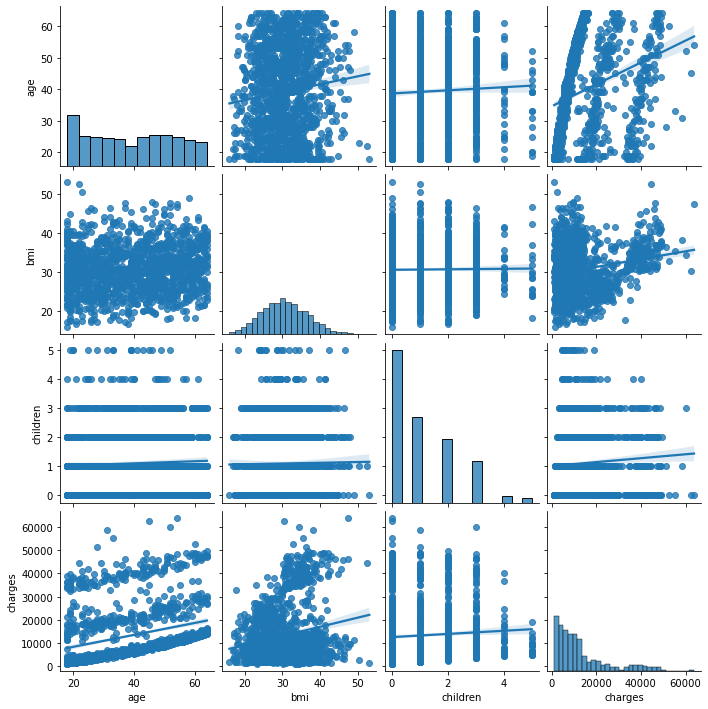

In [11]:
sns.pairplot(df,kind="reg")

# **Visualisasi Data Menggunakan 'seabron.heatmap'**
- Fungsi 'seaborn.heatmap' adalah Plot data persegi panjang sebagai matriks yang disandikan warna
- Heatmap digunakan untuk matriks korelasi dengan mengetahui nilai korelasi antar variabel satu dengan yang lain
- Nilai heatmap menunjukkan seberapa besar korelasi yang terjadi

<AxesSubplot:>

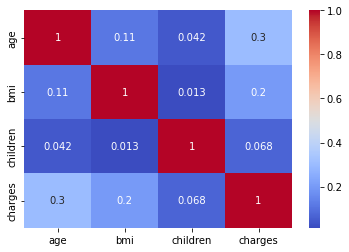

In [12]:
 #Plot a heatmap and look at the corelation
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)

# **Pengubahan pada Kategori Data**




Mengubah variabel yang berisi 2 hal menjadi bernilai antara 0 dan 1

In [13]:
df['sex']    = df['sex'].map({'male':1, 'female':0})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})

In [14]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


# **Pembentukan Bagian Training dan Testing Model**
* Proses training merupakan proses untuk membentuk model dengan menggunakan data training
* Proses testing merupakan proses untuk melakukan pengujian terhadap bagaimana performa dari model ketika diberikan data yang berbeda pada proses traning
* 'X_train' dan 'y_train' digunakan sebagai proses training
* 'X_test' digunakan sebagai data testing untuk memberikan prediksi
* Hasil prediksi akan dibandingan dengan 'y_test'

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('charges',axis=1) # Independet variable
y = df['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# **Linear Regression**
Melakukan training model dengan 'X_train' dan 'y_train'

In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# **Menampilkan Skor Pengujian**
Menampilkan skor pengujian 

In [17]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(lr.score(X_test,y_test))
print(lr.score(X_train,y_train))

0.7958786376014414
0.7340594348890694


# **Membuat Fungsi dengan 'PolynomialFeature' dan Menampilkan Hasil**
- 'sklearn.preprocessing.PolynomialFeatures' untuk Menghasilkan polinomial dan fitur interaksi.
- Membentuk model training dan testing
- Melakukan prediksi (training dan testing)
- Menampilkan hasil testing



In [18]:

X = df.drop(['charges','region_northwest','region_southeast','region_southwest'], axis = 1)
Y = df.charges



quad = PolynomialFeatures (degree = 2) #Polynomial Menghasilkan matriks fitur baru yang terdiri dari semua kombinasi polinomial fitur dengan derajat kurang dari atau sama dengan derajat yang ditentukan.
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))
print(plr.score(X_train,Y_train))

0.8849197344147227
0.827971069017031


# Implementasi Regression Coding
Matriks yang digunakan:

- explained variance score
- max error
- mean absolute error
- mean squared error

Berdasarkan: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

# Explained Variance Score

In [19]:
from sklearn.metrics import explained_variance_score
explained_variance_score(Y_test, Y_test_pred)

0.8853684446809311

# Max Error

In [20]:
from sklearn.metrics import max_error
max_error(Y_test, Y_test_pred)

20806.106163234894

# Mean Absolute Error

In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_test_pred)

2761.1348143598484

# Mean Squared Error

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_test_pred)

18117605.54423731